In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline


In [2]:
df = pd.read_csv("StudentsMentalHealth_Uncleaned.csv")
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,male,33,Visakhapatnam,Student,5,0,8.97,2.0,0,'5-6 hours',Healty,B.Pharm,Yes,3,1,No,1
1,8,femle,24,Bangalore,Student,2,0,5.90,5.0,0,'5-6 hours',modrate,bsc,No,3,2,Yes,0
2,26,male,31,Srinagar,Student,3,0,7.03,5.0,0,'Less than 5 hours',Healty,BA,No,9,1,Yes,0
3,30,femle,28,Varanasi,Student,3,0,5.59,2.0,0,'7-8 hours',modrate,BCA,Yes,4,5,Yes,1
4,32,femle,25,Jaipur,Student,4,0,8.13,3.0,0,'5-6 hours',modrate,M.Tech,Yes,1,1,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,femle,27,Surat,Student,5,0,5.75,5.0,0,'5-6 hours',Unhealthy,'Class 12',Yes,7,1,Yes,0
27897,140686,male,27,Ludhiana,Student,2,0,9.40,3.0,0,'Less than 5 hours',Healty,msc,No,0,3,Yes,0
27898,140689,male,31,Faridabad,Student,3,0,6.61,4.0,0,'5-6 hours',Unhealthy,MD,No,12,2,No,0
27899,140690,femle,18,Ludhiana,Student,5,0,6.88,2.0,0,'Less than 5 hours',Healty,'Class 12',Yes,10,5,No,1


In [3]:
df.isnull().any()

id                                       False
Gender                                   False
Age                                      False
City                                     False
Profession                               False
Academic Pressure                        False
Work Pressure                            False
CGPA                                     False
Study Satisfaction                        True
Job Satisfaction                         False
Sleep Duration                            True
Dietary Habits                           False
Degree                                   False
Have you ever had suicidal thoughts ?    False
Work/Study Hours                         False
Financial Stress                         False
Family History of Mental Illness         False
Depression                               False
dtype: bool

In [4]:
df.isnull().sum()

id                                          0
Gender                                      0
Age                                         0
City                                        0
Profession                                  0
Academic Pressure                           0
Work Pressure                               0
CGPA                                        0
Study Satisfaction                       1395
Job Satisfaction                            0
Sleep Duration                           1395
Dietary Habits                              0
Degree                                      0
Have you ever had suicidal thoughts ?       0
Work/Study Hours                            0
Financial Stress                            0
Family History of Mental Illness            0
Depression                                  0
dtype: int64

In [5]:
print(df.isnull().values.any())

True


In [6]:
df['Gender'] = df['Gender'].str.capitalize().replace({'Femle': 'Female'})

In [7]:
df['Dietary Habits'] = df['Dietary Habits'].str.capitalize().replace({'Healty': 'Healthy', 'Modrate': 'Moderate'})

In [8]:
df['Degree'] = df['Degree'].str.upper()

In [9]:
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.97,2.0,0,'5-6 hours',Healthy,B.PHARM,Yes,3,1,No,1
1,8,Female,24,Bangalore,Student,2,0,5.90,5.0,0,'5-6 hours',Moderate,BSC,No,3,2,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.03,5.0,0,'Less than 5 hours',Healthy,BA,No,9,1,Yes,0
3,30,Female,28,Varanasi,Student,3,0,5.59,2.0,0,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,1
4,32,Female,25,Jaipur,Student,4,0,8.13,3.0,0,'5-6 hours',Moderate,M.TECH,Yes,1,1,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27,Surat,Student,5,0,5.75,5.0,0,'5-6 hours',Unhealthy,'CLASS 12',Yes,7,1,Yes,0
27897,140686,Male,27,Ludhiana,Student,2,0,9.40,3.0,0,'Less than 5 hours',Healthy,MSC,No,0,3,Yes,0
27898,140689,Male,31,Faridabad,Student,3,0,6.61,4.0,0,'5-6 hours',Unhealthy,MD,No,12,2,No,0
27899,140690,Female,18,Ludhiana,Student,5,0,6.88,2.0,0,'Less than 5 hours',Healthy,'CLASS 12',Yes,10,5,No,1


In [10]:
df["Sleep Duration"] = df["Sleep Duration"].fillna(df["Sleep Duration"].mode()[0])

In [11]:
df.rename(columns={'Have you ever had suicidal thoughts ?': 'Suicidal Thoughts'}, inplace=True)

In [12]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree', 'Suicidal Thoughts',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [13]:
df.isnull().any()

id                                  False
Gender                              False
Age                                 False
City                                False
Profession                          False
Academic Pressure                   False
Work Pressure                       False
CGPA                                False
Study Satisfaction                   True
Job Satisfaction                    False
Sleep Duration                      False
Dietary Habits                      False
Degree                              False
Suicidal Thoughts                   False
Work/Study Hours                    False
Financial Stress                    False
Family History of Mental Illness    False
Depression                          False
dtype: bool

In [14]:
df["Study Satisfaction"] = df["Study Satisfaction"].fillna(df["Study Satisfaction"].median())

In [15]:
df.isnull().any()

id                                  False
Gender                              False
Age                                 False
City                                False
Profession                          False
Academic Pressure                   False
Work Pressure                       False
CGPA                                False
Study Satisfaction                  False
Job Satisfaction                    False
Sleep Duration                      False
Dietary Habits                      False
Degree                              False
Suicidal Thoughts                   False
Work/Study Hours                    False
Financial Stress                    False
Family History of Mental Illness    False
Depression                          False
dtype: bool

In [16]:
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.97,2.0,0,'5-6 hours',Healthy,B.PHARM,Yes,3,1,No,1
1,8,Female,24,Bangalore,Student,2,0,5.90,5.0,0,'5-6 hours',Moderate,BSC,No,3,2,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.03,5.0,0,'Less than 5 hours',Healthy,BA,No,9,1,Yes,0
3,30,Female,28,Varanasi,Student,3,0,5.59,2.0,0,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,1
4,32,Female,25,Jaipur,Student,4,0,8.13,3.0,0,'5-6 hours',Moderate,M.TECH,Yes,1,1,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27,Surat,Student,5,0,5.75,5.0,0,'5-6 hours',Unhealthy,'CLASS 12',Yes,7,1,Yes,0
27897,140686,Male,27,Ludhiana,Student,2,0,9.40,3.0,0,'Less than 5 hours',Healthy,MSC,No,0,3,Yes,0
27898,140689,Male,31,Faridabad,Student,3,0,6.61,4.0,0,'5-6 hours',Unhealthy,MD,No,12,2,No,0
27899,140690,Female,18,Ludhiana,Student,5,0,6.88,2.0,0,'Less than 5 hours',Healthy,'CLASS 12',Yes,10,5,No,1


In [17]:
df.info

<bound method DataFrame.info of            id  Gender  Age             City Profession  Academic Pressure  \
0           2    Male   33   Visakhapatnam     Student                  5   
1           8  Female   24        Bangalore    Student                  2   
2          26    Male   31        Srinagar     Student                  3   
3          30  Female   28        Varanasi     Student                  3   
4          32  Female   25           Jaipur    Student                  4   
...       ...     ...  ...              ...        ...                ...   
27896  140685  Female   27            Surat    Student                  5   
27897  140686    Male   27         Ludhiana    Student                  2   
27898  140689    Male   31        Faridabad    Student                  3   
27899  140690  Female   18         Ludhiana    Student                  5   
27900  140699    Male   27           Patna     Student                  4   

       Work Pressure  CGPA  Study Satisfact

In [18]:
df.dtypes

id                                    int64
Gender                               object
Age                                   int64
City                                 object
Profession                           object
Academic Pressure                     int64
Work Pressure                         int64
CGPA                                float64
Study Satisfaction                  float64
Job Satisfaction                      int64
Sleep Duration                       object
Dietary Habits                       object
Degree                               object
Suicidal Thoughts                    object
Work/Study Hours                      int64
Financial Stress                     object
Family History of Mental Illness     object
Depression                            int64
dtype: object

In [19]:
df['CGPA'] = pd.to_numeric(df['CGPA'], errors='coerce')

In [20]:
df.dtypes

id                                    int64
Gender                               object
Age                                   int64
City                                 object
Profession                           object
Academic Pressure                     int64
Work Pressure                         int64
CGPA                                float64
Study Satisfaction                  float64
Job Satisfaction                      int64
Sleep Duration                       object
Dietary Habits                       object
Degree                               object
Suicidal Thoughts                    object
Work/Study Hours                      int64
Financial Stress                     object
Family History of Mental Illness     object
Depression                            int64
dtype: object

In [21]:
print(df.info())        
print(df['Gender'].value_counts())  
print(df['Dietary Habits'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                27901 non-null  int64  
 1   Gender                            27901 non-null  object 
 2   Age                               27901 non-null  int64  
 3   City                              27901 non-null  object 
 4   Profession                        27901 non-null  object 
 5   Academic Pressure                 27901 non-null  int64  
 6   Work Pressure                     27901 non-null  int64  
 7   CGPA                              27901 non-null  float64
 8   Study Satisfaction                27901 non-null  float64
 9   Job Satisfaction                  27901 non-null  int64  
 10  Sleep Duration                    27901 non-null  object 
 11  Dietary Habits                    27901 non-null  object 
 12  Degr

In [22]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
27896    False
27897    False
27898    False
27899    False
27900    False
Length: 27901, dtype: bool

In [23]:
df.info

<bound method DataFrame.info of            id  Gender  Age             City Profession  Academic Pressure  \
0           2    Male   33   Visakhapatnam     Student                  5   
1           8  Female   24        Bangalore    Student                  2   
2          26    Male   31        Srinagar     Student                  3   
3          30  Female   28        Varanasi     Student                  3   
4          32  Female   25           Jaipur    Student                  4   
...       ...     ...  ...              ...        ...                ...   
27896  140685  Female   27            Surat    Student                  5   
27897  140686    Male   27         Ludhiana    Student                  2   
27898  140689    Male   31        Faridabad    Student                  3   
27899  140690  Female   18         Ludhiana    Student                  5   
27900  140699    Male   27           Patna     Student                  4   

       Work Pressure  CGPA  Study Satisfact

In [24]:
df.drop('Job Satisfaction',axis=1,inplace=True)

In [25]:
df.drop('Work Pressure',axis=1,inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                27901 non-null  int64  
 1   Gender                            27901 non-null  object 
 2   Age                               27901 non-null  int64  
 3   City                              27901 non-null  object 
 4   Profession                        27901 non-null  object 
 5   Academic Pressure                 27901 non-null  int64  
 6   CGPA                              27901 non-null  float64
 7   Study Satisfaction                27901 non-null  float64
 8   Sleep Duration                    27901 non-null  object 
 9   Dietary Habits                    27901 non-null  object 
 10  Degree                            27901 non-null  object 
 11  Suicidal Thoughts                 27901 non-null  object 
 12  Work

In [27]:


df

,id,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,8.97,2.0,'5-6 hours',Healthy,B.PHARM,Yes,3,1,No,1
1,8,Female,24,Bangalore,Student,2,5.90,5.0,'5-6 hours',Moderate,BSC,No,3,2,Yes,0
2,26,Male,31,Srinagar,Student,3,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9,1,Yes,0
3,30,Female,28,Varanasi,Student,3,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,1
4,32,Female,25,Jaipur,Student,4,8.13,3.0,'5-6 hours',Moderate,M.TECH,Yes,1,1,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27,Surat,Student,5,5.75,5.0,'5-6 hours',Unhealthy,'CLASS 12',Yes,7,1,Yes,0
27897,140686,Male,27,Ludhiana,Student,2,9.40,3.0,'Less than 5 hours',Healthy,MSC,No,0,3,Yes,0
27898,140689,Male,31,Faridabad,Student,3,6.61,4.0,'5-6 hours',Unhealthy,MD,No,12,2,No,0
27899,140690,Female,18,Ludhiana,Student,5,6.88,2.0,'Less than 5 hours',Healthy,'CLASS 12',Yes,10,5,No,1


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le=LabelEncoder()

In [30]:
df["Depression"] = df["Depression"].map({0: "No", 1: "Yes"})
df

,id,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,8.97,2.0,'5-6 hours',Healthy,B.PHARM,Yes,3,1,No,Yes
1,8,Female,24,Bangalore,Student,2,5.90,5.0,'5-6 hours',Moderate,BSC,No,3,2,Yes,No
2,26,Male,31,Srinagar,Student,3,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9,1,Yes,No
3,30,Female,28,Varanasi,Student,3,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,Yes
4,32,Female,25,Jaipur,Student,4,8.13,3.0,'5-6 hours',Moderate,M.TECH,Yes,1,1,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27,Surat,Student,5,5.75,5.0,'5-6 hours',Unhealthy,'CLASS 12',Yes,7,1,Yes,No
27897,140686,Male,27,Ludhiana,Student,2,9.40,3.0,'Less than 5 hours',Healthy,MSC,No,0,3,Yes,No
27898,140689,Male,31,Faridabad,Student,3,6.61,4.0,'5-6 hours',Unhealthy,MD,No,12,2,No,No
27899,140690,Female,18,Ludhiana,Student,5,6.88,2.0,'Less than 5 hours',Healthy,'CLASS 12',Yes,10,5,No,Yes


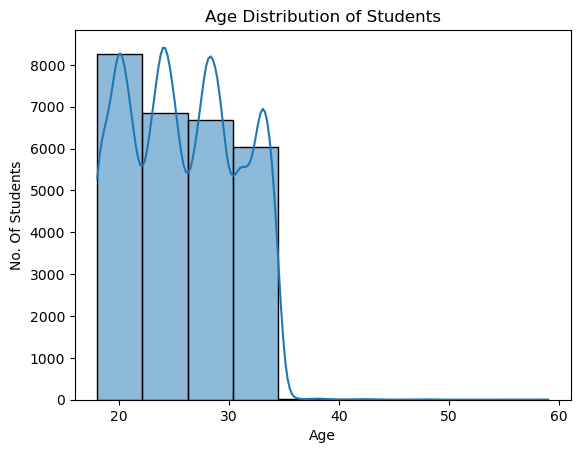

In [31]:
sns.histplot(df["Age"], bins=10, kde=True)
plt.title("Age Distribution of Students")
plt.ylabel("No. Of Students")
plt.show()

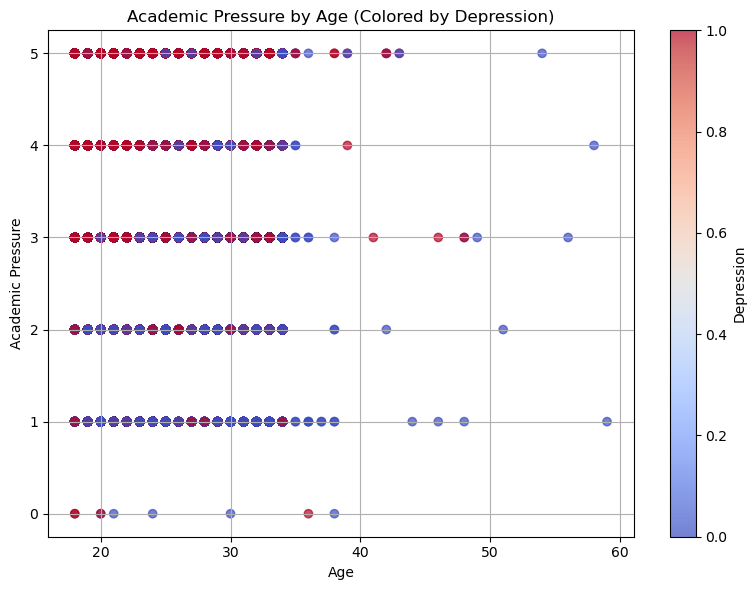

In [32]:
df["Depressed"] = df["Depression"].map({"Yes": 1, "No": 0})

plt.figure(figsize=(8, 6))
plt.scatter(df["Age"], df["Academic Pressure"], 
            c=df["Depressed"], cmap="coolwarm", alpha=0.7)

plt.xlabel("Age")
plt.ylabel("Academic Pressure")
plt.title("Academic Pressure by Age (Colored by Depression)")
plt.colorbar(label="Depression")
plt.grid(True)
plt.tight_layout()
plt.show()

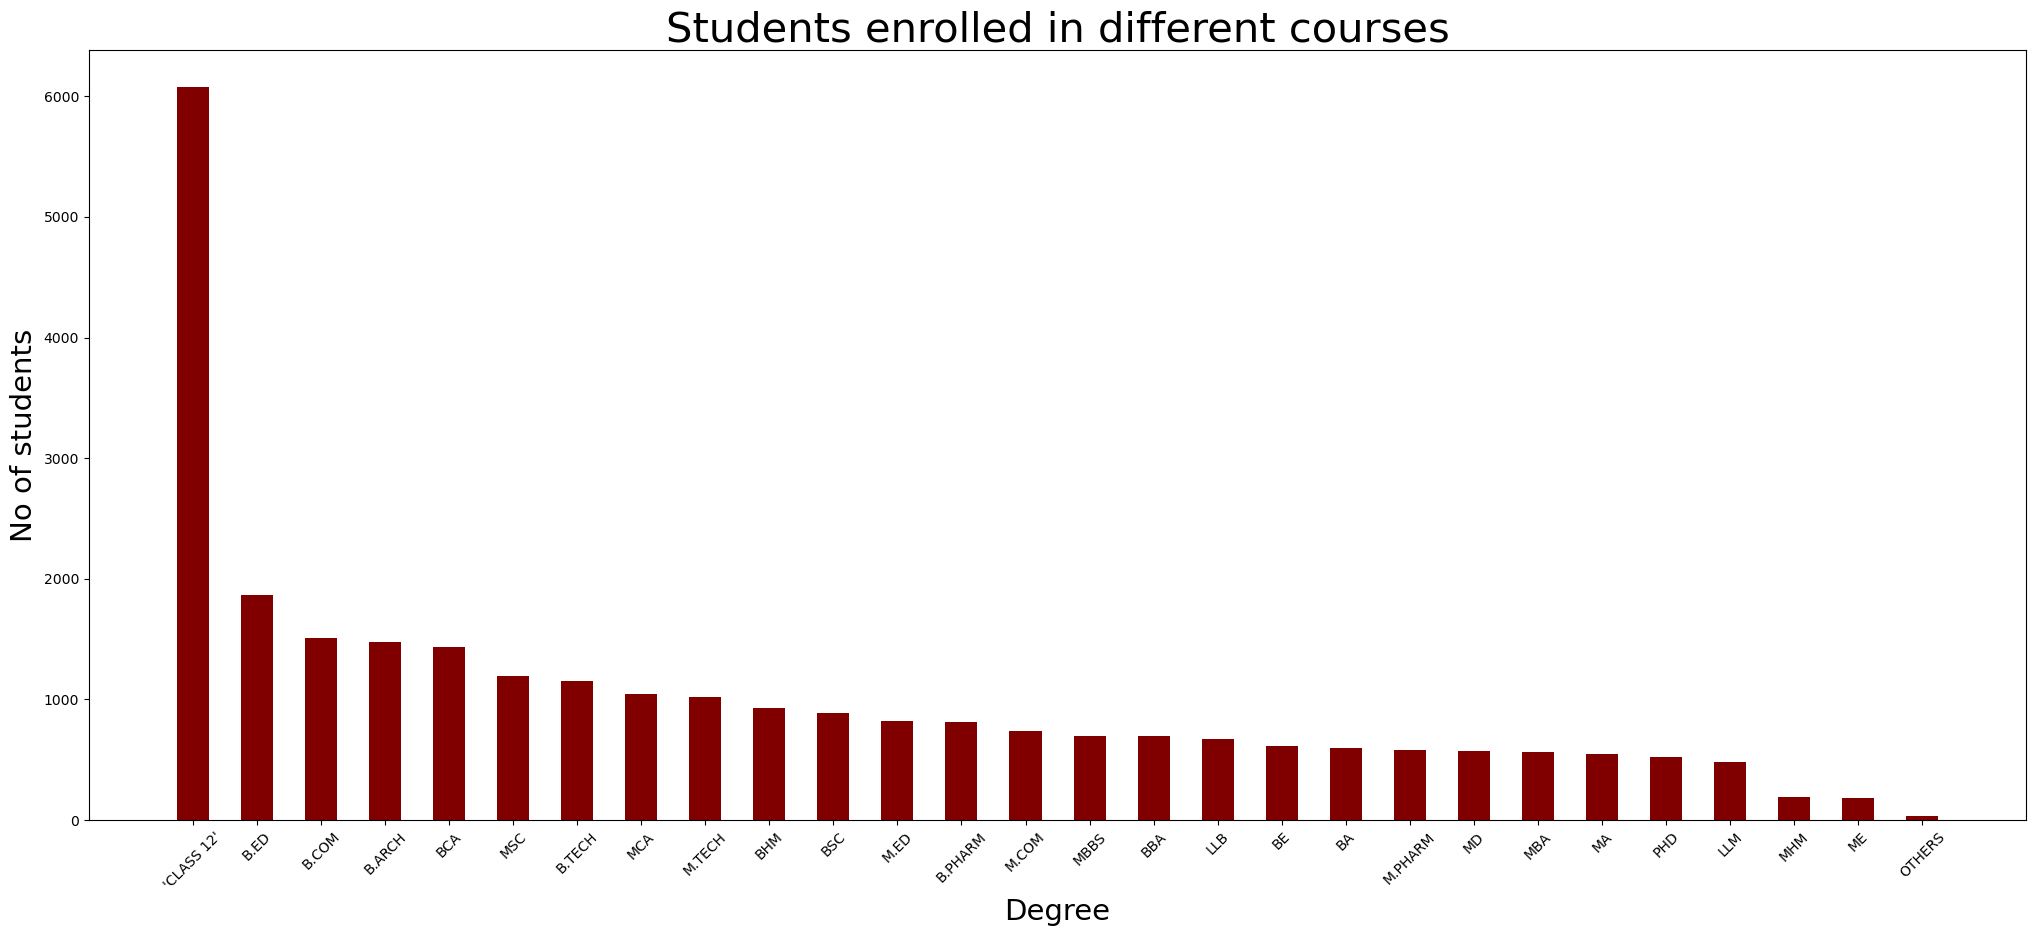

In [33]:

# No of students per degree
degree_counts = df["Degree"].value_counts()

plt.figure(figsize=(25, 10))
plt.bar(degree_counts.index, degree_counts.values, color='maroon', width=0.5)
plt.xlabel("Degree",fontsize=21)
plt.ylabel("No of students",fontsize=21)
plt.title("Students enrolled in different courses",fontsize=30)
plt.xticks(rotation=45)  
plt.show()

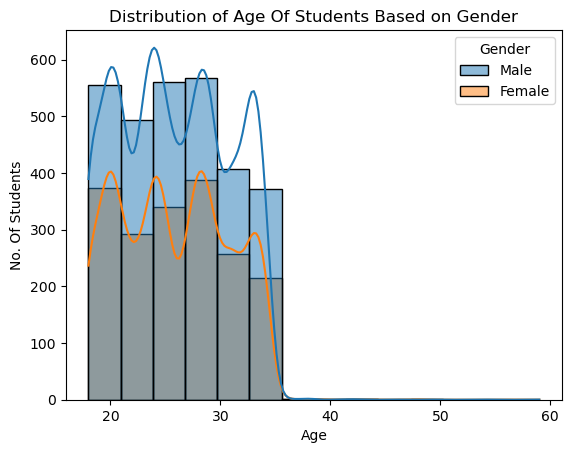

In [34]:
sns.histplot(x='Age',data=df,stat='frequency',hue='Gender', kde=True,binwidth=3)

plt.ylabel("No. Of Students")
plt.title("Distribution of Age Of Students Based on Gender")
plt.show()


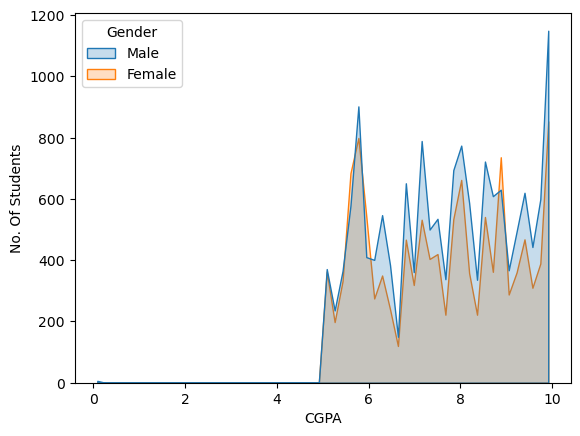

In [35]:
sns.histplot(x='CGPA',hue='Gender',element='poly',data=df)
plt.ylabel("No. Of Students")
plt.show()

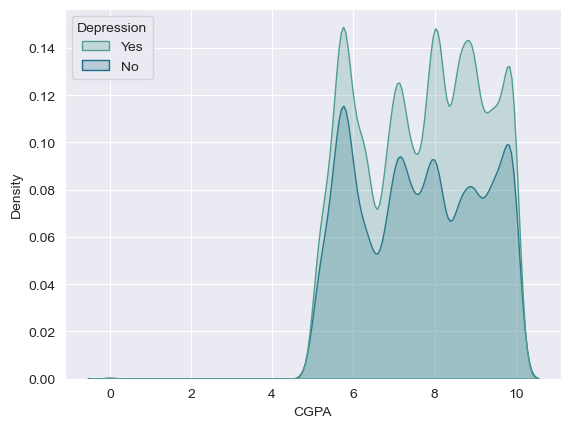

In [36]:
#kernal density estimator(kde)
sns.set_style('darkgrid')
sns.kdeplot(x="CGPA",bw_adjust=0.8,hue='Depression',palette='crest',fill=True,data=df)
plt.show()

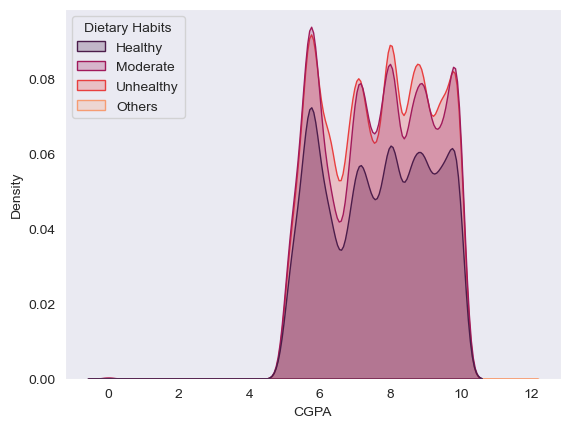

In [37]:
sns.set_style('dark')
sns.kdeplot(x="CGPA",bw_adjust=0.8,hue='Dietary Habits',palette='rocket',fill=True,data=df)
plt.show()

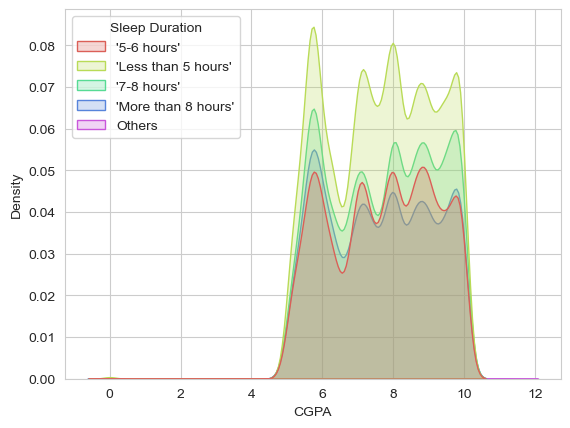

In [38]:
sns.set_style('whitegrid')
sns.kdeplot(x="CGPA",bw_adjust=0.8,hue='Sleep Duration',palette='hls',fill=True,data=df)
plt.show()

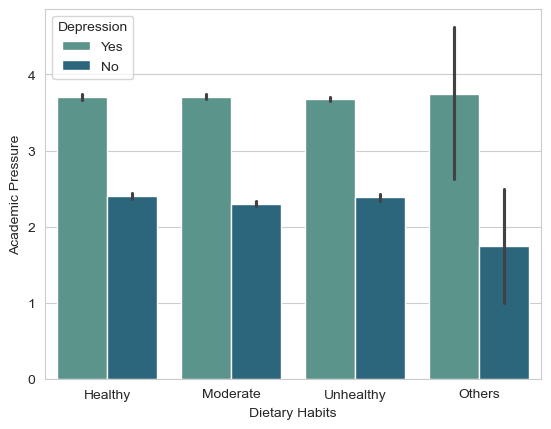

In [39]:
    #Categorical PLOTS
#i)BARPLOT
sns.barplot(x="Dietary Habits",y="Academic Pressure",palette='crest',hue="Depression",data=df)
plt.show()


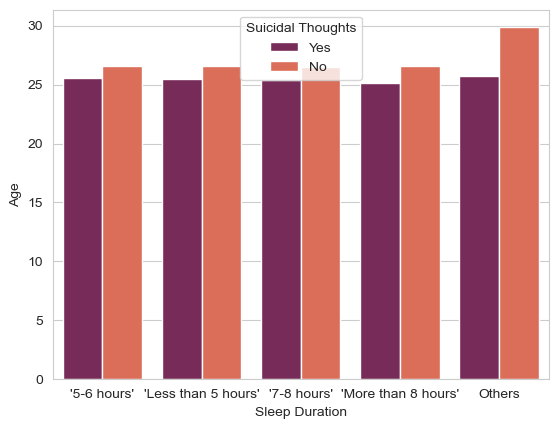

In [40]:
sns.barplot(x="Sleep Duration",y="Age",hue="Suicidal Thoughts",palette="rocket",errorbar=None,data=df)
plt.show()

#ci-confidence interval, used to remove those black bars above the bars.

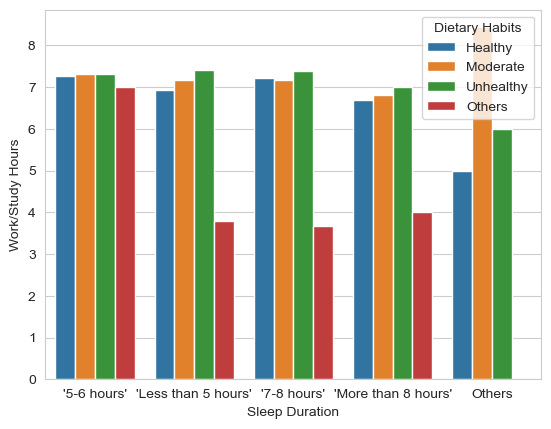

In [41]:
sns.barplot(x="Sleep Duration",y="Work/Study Hours",hue="Dietary Habits",errorbar=None,data=df)
plt.show()

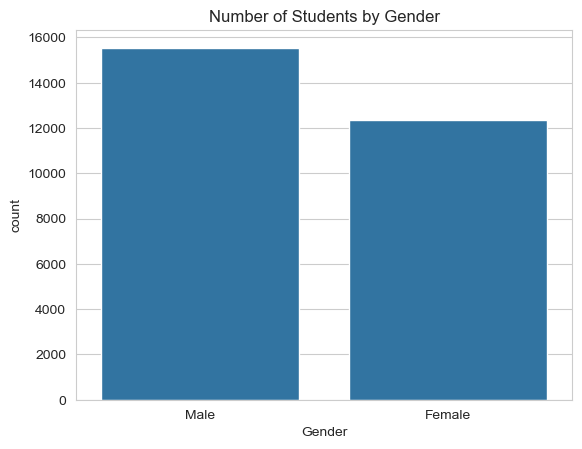

In [42]:
#ii)COUNTPLOT
#Draws a count plot to show the count of observations in each categorical bin using bars.
sns.countplot(x="Gender", data=df)
plt.title("Number of Students by Gender")
plt.show()

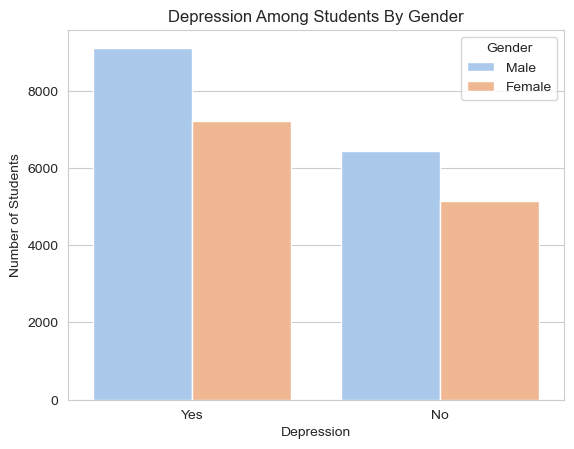

In [43]:
sns.countplot(x="Depression", palette="pastel",hue="Gender",data=df)
plt.xlabel("Depression")
plt.title("Depression Among Students By Gender")
plt.ylabel("Number of Students")
plt.show()

In [44]:
df

,id,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Depressed
0,2,Male,33,Visakhapatnam,Student,5,8.97,2.0,'5-6 hours',Healthy,B.PHARM,Yes,3,1,No,Yes,1
1,8,Female,24,Bangalore,Student,2,5.90,5.0,'5-6 hours',Moderate,BSC,No,3,2,Yes,No,0
2,26,Male,31,Srinagar,Student,3,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9,1,Yes,No,0
3,30,Female,28,Varanasi,Student,3,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,Yes,1
4,32,Female,25,Jaipur,Student,4,8.13,3.0,'5-6 hours',Moderate,M.TECH,Yes,1,1,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27,Surat,Student,5,5.75,5.0,'5-6 hours',Unhealthy,'CLASS 12',Yes,7,1,Yes,No,0
27897,140686,Male,27,Ludhiana,Student,2,9.40,3.0,'Less than 5 hours',Healthy,MSC,No,0,3,Yes,No,0
27898,140689,Male,31,Faridabad,Student,3,6.61,4.0,'5-6 hours',Unhealthy,MD,No,12,2,No,No,0
27899,140690,Female,18,Ludhiana,Student,5,6.88,2.0,'Less than 5 hours',Healthy,'CLASS 12',Yes,10,5,No,Yes,1


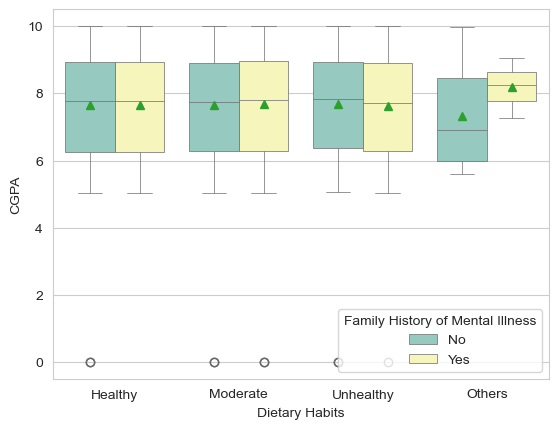

In [45]:
sns.boxplot(x="Dietary Habits",y="CGPA",hue="Family History of Mental Illness",showmeans=True,palette="Set3",linewidth=0.5,data=df)
plt.show()


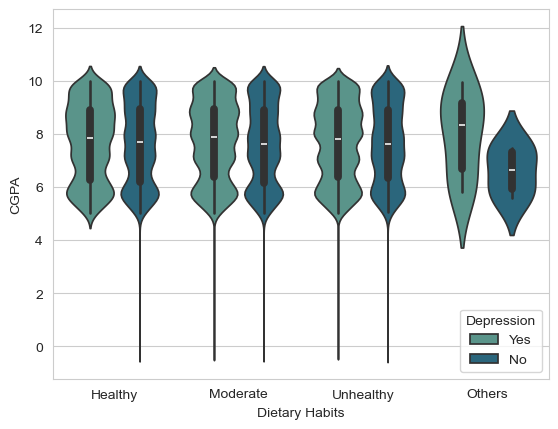

In [46]:
#iv)VIOLIN PLOT
sns.violinplot(x='Dietary Habits',palette="crest",hue="Depression",y="CGPA",data=df)
plt.show()

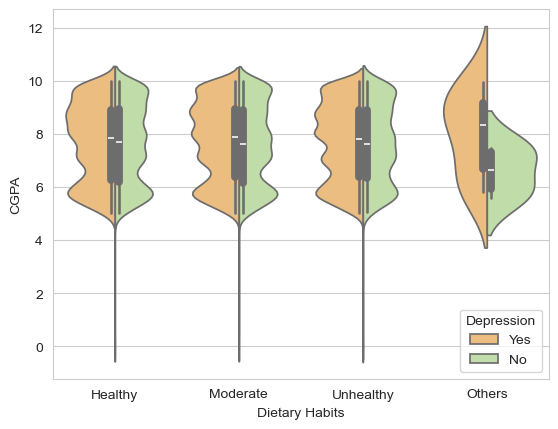

In [47]:
sns.violinplot(x='Dietary Habits',palette="Spectral",split=True,hue="Depression",y="CGPA",data=df)
plt.show()

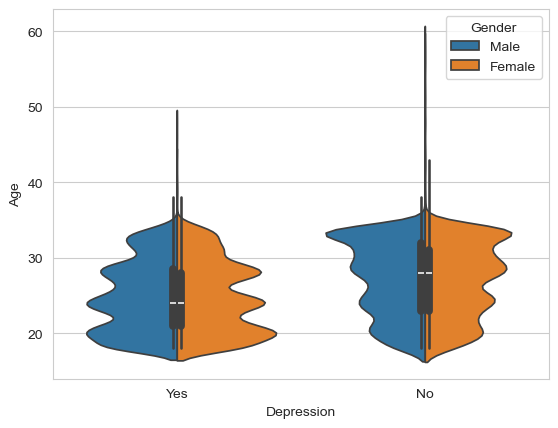

In [48]:
sns.violinplot(x='Depression',y="Age",hue='Gender',split=True,data=df)
plt.show()

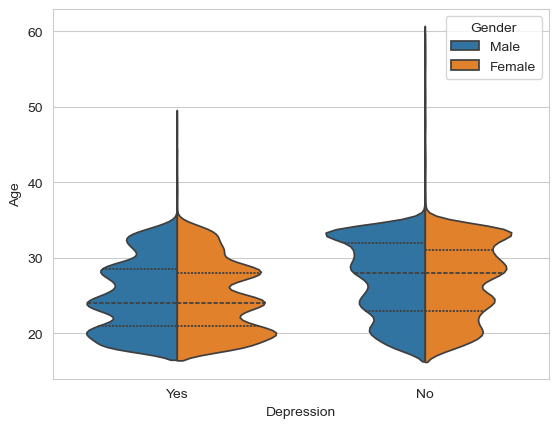

In [49]:

sns.violinplot(x='Depression',y="Age",hue='Gender',inner="quart",split=True,data=df)
plt.show()

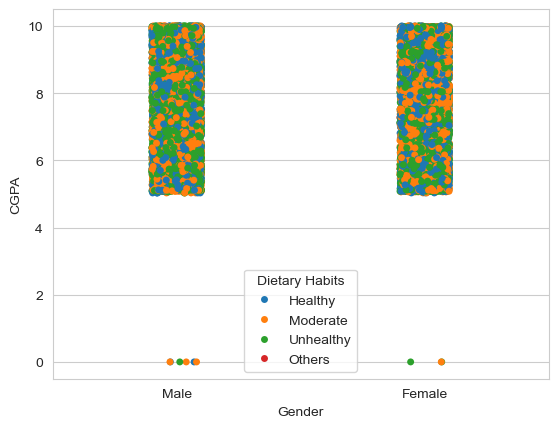

In [50]:
#v)STRIP PLOT
sns.stripplot(x='Gender',y='CGPA',edgecolor='yellow',hue="Dietary Habits",data=df)
plt.show()


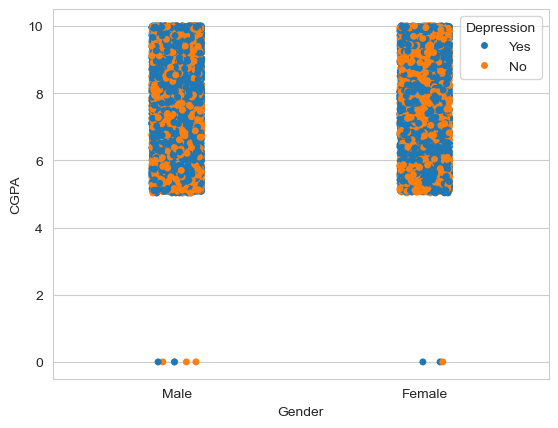

In [51]:
sns.stripplot(x='Gender',y='CGPA',edgecolor='green',hue="Depression",data=df)
plt.show()


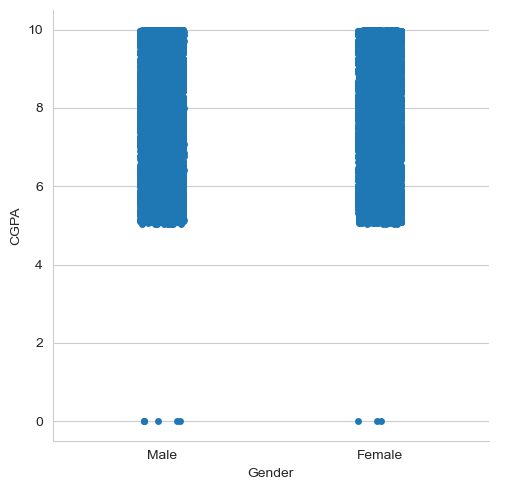

In [52]:
sns.catplot(x='Gender',y='CGPA',data=df)     #default it is strip plot
plt.show()

C:\Users\BENISH\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 91.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\BENISH\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 89.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\BENISH\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 95.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\BENISH\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 94.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


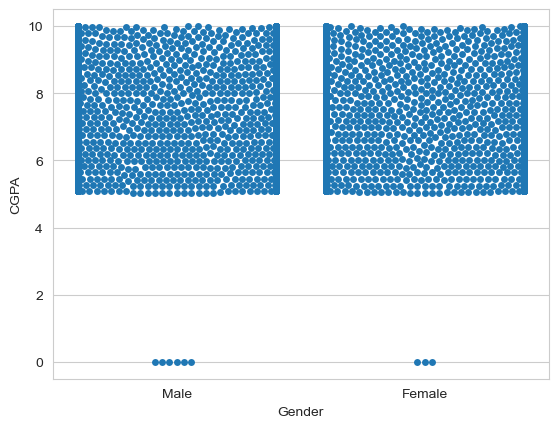

In [53]:
sns.swarmplot(x='Gender',y='CGPA',data=df)
plt.show()

In [54]:
sns.catplot(x='Sleep Duration',y='CGPA',hue="Gender",col="Depression",data=df)

